In [1]:
import numpy as np
import pandas as pd

In [2]:
sales=pd.read_csv('Sales_add.csv')

In [3]:
sales.count()

Month                             22
Region                            22
Manager                           22
Sales_before_digital_add(in $)    22
Sales_After_digital_add(in $)     22
dtype: int64

# Does digital marketing increases sales?

    Since the sample size is less than 30, we use a t-test.
    Here, we have to test the significant difference before and after digital marketing.
    Therefore, we use paired t-test.
    Also, here we have to check whether there is any increase in sales. 
    Therefore, it's one-tailed.
    
    Null Hypothesis: Sales before and after digital marketing are same.
    Alternative Hypothesis: Sales increases after digital marketing.
    
    4 Assumptions to be satisfied:
    
    1.The distribution should be normal.
    2.The dependent variable must be continuous.
    3.There should not be any significant outliers.
    4.The observations are independent.

In [51]:
# Checking for outliers

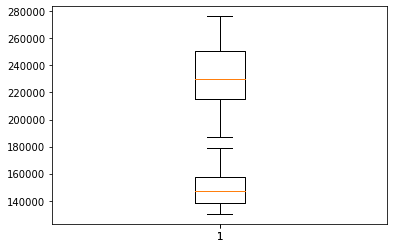

In [76]:
import matplotlib.pyplot as plt
plt.boxplot(sales['Sales_before_digital_add(in $)'])
plt.boxplot(sales['Sales_After_digital_add(in $)'])
plt.show()

In [52]:
# Checking normality

(array([3., 1., 2., 1., 5., 2., 2., 3., 1., 2.]),
 array([187305. , 196202.4, 205099.8, 213997.2, 222894.6, 231792. ,
        240689.4, 249586.8, 258484.2, 267381.6, 276279. ]),
 <BarContainer object of 10 artists>)

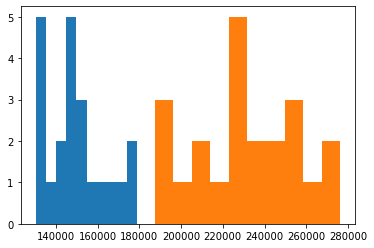

In [55]:
plt.hist(sales['Sales_before_digital_add(in $)'])
plt.hist(sales['Sales_After_digital_add(in $)'])

    Since the histogram doesn't look normal, we can test it statistically using Shapiro-Wilk test for normality.
    In this test, it is assumed that the distribution is normal. So, if p-value<0.05, we can reject this assumption. 
    Otherwise, the distribution is considered as normal.

In [57]:
stats.shapiro(sales['Sales_before_digital_add(in $)'])

ShapiroResult(statistic=0.9306764006614685, pvalue=0.12674309313297272)

In [58]:
stats.shapiro(sales['Sales_After_digital_add(in $)'])

ShapiroResult(statistic=0.9702128767967224, pvalue=0.7159645557403564)

    Since both test results show that the p-value>=0.05, we can consider the distribution as normal.

In [ ]:
# Paired t test

In [116]:
import scipy.stats as stats
tscore,pvalue=stats.ttest_rel(sales['Sales_After_digital_add(in $)'],sales['Sales_before_digital_add(in $)'],alternative='greater')
tscore,pvalue

(12.09070525287017, 3.168333502287889e-11)

    Significance level = 5% = 0.05
    Degrees of freedom = n-1 = 22-1 =21
    
    Since we have to check for increase in sales, a right-tailed critical value should be obtained.
    For that, q=1-0.05 (for 5%) 

In [117]:
t_critic=stats.t.ppf(1-0.05,21)
t_critic

1.7207429028118775

In [118]:
if(tscore>t_critic and pvalue<0.05):
    print('We can reject the null hypothesis\nThere is increase in sales after digital marketing')
else:
    print('We cannot reject the null hypothesis\nSales remains same after digital marketing')

We can reject the null hypothesis
There is increase in sales after digital marketing


#    Dependency between 'Region' and 'Manager'

    This can be checked by using a Chi-Square test for independence.
    Null Hypothesis: 'Region' and 'Manager' are independent.
    Alternative Hypothesis: They are dependent.
    This test needs to have the contingency table.

In [78]:
# Contingency table

In [85]:
cont=pd.crosstab(sales.Region, sales.Manager, margins=True)
cont

Manager,Manager - A,Manager - B,Manager - C,All
Region,,,,
Region - A,4,3,3,10
Region - B,4,1,2,7
Region - C,1,3,1,5
All,9,7,6,22


In [ ]:
# Finding observed frequencies

In [88]:
obs = np.array([cont.iloc[0][0:3].values,
                cont.iloc[1][0:3].values,
                cont.iloc[2][0:3].values])
obs

array([[4, 3, 3],
       [4, 1, 2],
       [1, 3, 1]], dtype=int64)

In [93]:
# Finding Chi-Square value, p-value, degrees of freedom and expected frequencies

In [124]:
chi2_score,pvalue,dof,exp=stats.chi2_contingency(obs)
chi2_score,pvalue,dof,exp

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [121]:
# Finding Chi-Square critical value for 5% significance level

In [122]:
chi2_critic=stats.chi2.ppf(1-0.05,dof)
chi2_critic

9.487729036781154

In [125]:
if(chi2_score>chi2_critic and pvalue<0.05):
    print('We can reject the null hypothesis \nThat is, \'Region\' and \'Manager\' are dependent.')
else:
    print('We cannot reject the null hypothesis \nThat is, \'Region\' and \'Manager\' are independent.')

We cannot reject the null hypothesis 
That is, 'Region' and 'Manager' are independent.
